In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugData = pd.read_csv(mouse_drug_data_to_load)
clinicalTrialData = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

allData = pd.merge(mouseDrugData, clinicalTrialData, on='Mouse ID')

# Display the data table for preview
allData.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumorVolumeMean = allData.groupby(['Timepoint', 'Drug']).mean()
tumorVolumeMean.head()

Tumor Volume (mm3)  Metastatic Sites
Timepoint Drug                                           
0         Capomulin                45.0               0.0
          Ceftamin                 45.0               0.0
          Infubinol                45.0               0.0
          Ketapril                 45.0               0.0
          Naftisol                 45.0               0.0

In [3]:
tumorVolumeMean = tumorVolumeMean['Tumor Volume (mm3)'].unstack()

In [4]:
tumorVolumeMean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorVolumeStandardError = allData.groupby(['Timepoint', 'Drug']).sem()
# Convert to DataFrame
tumorVolumeStandardError = tumorVolumeStandardError['Tumor Volume (mm3)'].unstack()
# Preview DataFrame
tumorVolumeStandardError.head()
# tumorVolumeStandardError.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


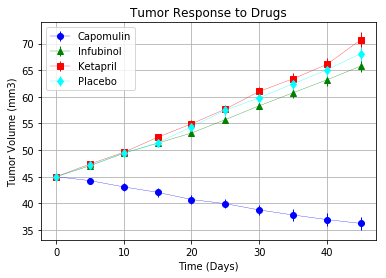

In [6]:
# Generate the Plot (with Error Bars)
xSeries = tumorVolumeMean.index.values

drugsToChart = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
symbols =  ['-o', '-^', '-s', '-d']
colors = ['blue', 'green', 'red', 'cyan']
seriesFormat = zip(drugsToChart, symbols, colors)

for drug, symbol, color in seriesFormat:
    plt.errorbar(xSeries, tumorVolumeMean[drug], tumorVolumeStandardError[drug], label=drug, linewidth=0.3, elinewidth=1.0, fmt=symbol, color=color)

plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.title("Tumor Response to Drugs")

# Save the Figure
plt.savefig('Tumor Response to Drugs.png')


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metSiteMean = allData.groupby(['Timepoint', 'Drug']).mean()


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metSiteStandardError = allData.groupby(['Timepoint', 'Drug']).sem()


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metSiteMean = metSiteMean['Metastatic Sites'].unstack()
metSiteStandardError = metSiteStandardError['Metastatic Sites'].unstack()
# Preview that Reformatting worked

metSiteMean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
metSiteStandardError.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


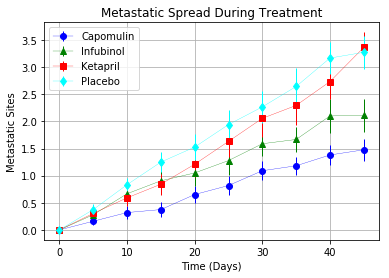

In [12]:
# Generate the Plot (with Error Bars)
drugsToChart = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
symbols =  ['-o', '-^', '-s', '-d']
colors = ['blue', 'green', 'red', 'cyan']
seriesFormat = zip(drugsToChart, symbols, colors)

for drug, symbol, color in seriesFormat:
    plt.errorbar(xSeries, metSiteMean[drug], metSiteStandardError[drug], label=drug, linewidth=0.3, elinewidth=1.0, fmt=symbol, color=color)

plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")

# Show the Figure
plt.show()


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceByDrugOverTime = allData.groupby(["Timepoint", 'Drug']).count()['Mouse ID'].unstack()


# Preview DataFrame
miceByDrugOverTime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


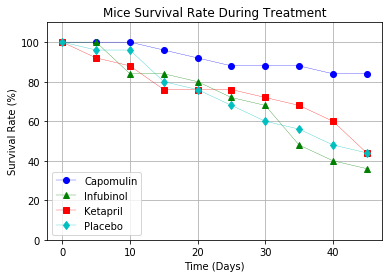

In [14]:
# Generate the Plot (Accounting for percentages)

totalMice = miceByDrugOverTime.iloc[0,0]
drugsToChart = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
symbols =  ['b-o', 'g-^', 'r-s', 'c-d']
# colors = ['blue', 'green', 'red', 'cyan']
seriesFormat = zip(drugsToChart, symbols)


for drug, symbol in seriesFormat:
    plt.plot (xSeries, miceByDrugOverTime[drug]/totalMice*100, symbol, label=drug, linewidth=0.3)

# plt.plot(xSeries, metSiteMean['Capomulin'], )
plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.ylim(0,110)
plt.grid()
plt.title("Mice Survival Rate During Treatment")


# Save the Figure
plt.savefig("Survival Rate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
positiveChange = {}
negativeChange = {}

for drug in drugsToChart:
    first = tumorVolumeMean.loc[0, drug]
    last = tumorVolumeMean.loc[tumorVolumeMean.index[-1], drug]
    change = (last-first)/first*100
    if change > 0:
        positiveChange[drug] = change
    else:
        negativeChange[drug] = change
        



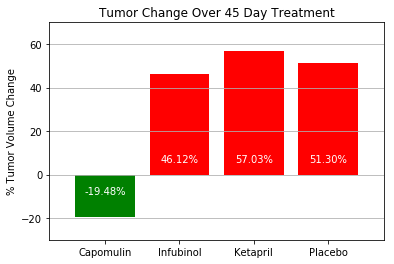

In [16]:
# Store all Relevant Percent Changes into a Tuple
rects1 = plt.bar (negativeChange.keys(), negativeChange.values(), color='green')
rects2 = plt.bar (positiveChange.keys(), positiveChange.values(), color='red')

plt.grid(axis='y')
plt.ylim(-30, 70)
plt.xlim(-0.75, len(drugsToChart)-0.25)

# Use functions to label the percentages of changes
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2., 5,
                    '{:.2f}%'.format(height),
                    ha='center', va='bottom', color='white')
        else:
             plt.text(rect.get_x() + rect.get_width()/2., -10,
                    '{:.2f}%'.format(height),
                    ha='center', va='bottom', color='white')
            


# Call functions to implement the function calls

autolabel(rects1)
autolabel(rects2)

plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Save the Figure
plt.savefig ("Tumor Change During Treatment.png")

# Show the Figure
plt.show()


In [36]:
(test, p) = ttest_ind(tumorVolumeMean['Ketapril'], tumorVolumeMean['Placebo'], equal_var=False)
p

0.8298632170774808

## Analysis 

Capomulin treated cancer more effectively than Infubinol or Ketapril:
- The cancer shrank close to 20% on average
- Over 80% of mice were live after the 45 days of treatment
- The other two drugs had similar affect as placebo
- It even appears that Ketapril had the opposite effect on cancer (it grew by 57% on average, compared to 51% for placebo) However, further analysis using ttest shows that the difference is not significant (p value of 0.83)

